# Cancelled Agreement Analysis





# Table of contents:
- 

## Combine excel sheets on significant columns and merge

In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats


os.chdir(r'C:\Users\jean-claude.disch\Jupyter Notebook Projects\OpsagteVirksomhederAnalyse')

y2021 = pd.read_excel('Opsagte aftaler 2021.xlsx', header = 1)
y2022 = pd.read_excel('Opsagte aftaler 2022.xlsx', header= 1)
y2023 = pd.read_excel('Opsagte aftaler 2023.xlsx', header = 1)

# Convert the CVR number columns to string in all dataframes after dropping NA values
y2021 = y2021.dropna(subset=['CVR'])
y2021['CVR'] = y2021['CVR'].astype(int).astype(str)
y2021 = y2021[y2021['CVR'].str.len() == 8]

y2022 = y2022.dropna(subset=['CVR'])
y2022['CVR'] = y2022['CVR'].astype(int).astype(str)
y2022 = y2022[y2022['CVR'].str.len() == 8]

y2023 = y2023.dropna(subset=['CVR'])
y2023['CVR'] = y2023['CVR'].astype(int).astype(str)
y2023 = y2023[y2023['CVR'].str.len() == 8]



# Filter the dataframes based on the 'Kategori' column
y2021 = y2021[y2021['Kategori'] == 'Churn - hel aftale']
y2022 = y2022[y2022['Kategori'] == 'Churn - hel aftale']
y2023 = y2023[y2023['Kategori'] == 'Churn - hel aftale']

# Add a 'Year' column to the dataframes
y2021['Year'] = 2021
y2022['Year'] = 2022
y2023['Year'] = 2023

# Concatenate the dataframes vertically
all_years = pd.concat([y2021[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:', 'Årsag', 'Ny leverandør']], 
                       y2022[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:', 'Årsag', 'Ny leverandør']], 
                       y2023[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:', 'Ny leverandør']]])

# Convert 'Opsagt dato:' column to datetime format
all_years['Opsagt dato:'] = pd.to_datetime(all_years['Opsagt dato:'], errors='coerce', dayfirst=True)

# Create 'Quarter' column

all_years['Quarter'] = all_years['Opsagt dato:'].dt.to_period('Q')
cancelled_by_quarter = all_years.groupby(['Year', 'Quarter']).size()


# Save the merged dataframe to an Excel file
all_years.to_excel('AllYearsMerged.xlsx', index=False)


## How many customers cancelled their agremeent in 2021, 2022 and 2023?

In [2]:
# Get the total number of customers who cancelled their agreement
total_cancelled = len(all_years)

# Get the number of customers who cancelled their agreement each year
cancelled_each_year = all_years['Year'].value_counts().sort_index()

# Print the results
print("Total customers who cancelled their agreement (2021-2023): ", total_cancelled)
print("Customers who cancelled their agreement each year:\n", cancelled_each_year)


Total customers who cancelled their agreement (2021-2023):  232
Customers who cancelled their agreement each year:
 2021    91
2022    83
2023    58
Name: Year, dtype: int64


## This means that:
- In 2021 91 companies cancelled their entire agreement with us
- In 2022 83 companies cancelled their entire agreement with us
- in 2023 58 companies cancelled their entire agreement with us (so far)

In total 232 companies have cancelled their agreement from 2021 to current 2023.

## Quarterly visualization of the above

Below it is showcased in which quarter of the year companies cancel their agreement. To illustrate:

2021 2021Q1 19 

Means that in during 2021 Q1, 19 companies cancelled their agreement.

In [40]:
cancelled_by_quarter

Year  Quarter
2021  2021Q1     19
      2021Q2     30
      2021Q3     20
      2021Q4     22
2022  2021Q4      1
      2022Q1     31
      2022Q2     15
      2022Q3     16
      2022Q4     19
2023  2023Q1     15
      2023Q2     29
      2023Q3     13
dtype: int64

## Pearson correlation coefficient for the above:

In [41]:
# Convert the MultiIndex to a DataFrame and reset index
cancelled_by_quarter_df = cancelled_by_quarter.reset_index()

# Create a new column representing quarters as a numerical value
cancelled_by_quarter_df['Numerical_Quarter'] = range(1, len(cancelled_by_quarter_df)+1)

# Get the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(cancelled_by_quarter_df['Numerical_Quarter'], cancelled_by_quarter_df[0])

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: -0.14412378342493287
p-value: 0.6549615972292149


# Which TCV-range are companies that cancelled theri agreement within?

In [5]:
# Define bins
bins = [0, 20000, 40000, 60000, 80000,  100000, 120000, 140000, 160000, 180000, 200000]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', 
          '100000-120000', '120000-140000', '140000-160000', '160000-180000', '180000-200000']


# Create a new column 'TCV_range' in fakturering dataframe based on 'Beløb 12 mdr. (TCV)' column
all_years['TCV_range'] = pd.cut(all_years['Beløb 12 mdr. (TCV)'], bins=bins, labels=labels)

# Count the number of companies in each TCV_range
tcv_count = all_years.groupby('TCV_range').size()

print(tcv_count)
# indsæt virksomhedsnavn i stedet

TCV_range
0-20000          40
20000-40000      43
40000-60000      38
60000-80000      26
80000-100000     14
100000-120000    11
120000-140000     9
140000-160000    15
160000-180000     6
180000-200000     5
dtype: int64


In [6]:
for tcv_range in labels:
    # Filter dataframe for the current TCV range
    df = all_years[all_years['TCV_range'] == tcv_range]

    # Save the dataframe to an Excel file
    df.to_excel(f'{tcv_range}.xlsx', index=False)

## This means that:
- Within the 0-20000 DKK range, 38 companies fall within
- Within the 20000-40000 DKK range, 39 companies fall within

etc.

We also convert each range into an excel-file so that we can see which specific companies fall within each range.

# What is the total sum (Beløb 12 mdr. (TCV)) for each year?

In [7]:
# Calculate the total sum of 'Beløb 12 mdr. (TCV)' for all years
total_tcv_sum = all_years['Beløb 12 mdr. (TCV)'].sum()

# Calculate the sum of 'Beløb 12 mdr. (TCV)' for each year
tcv_sum_each_year = all_years.groupby('Year')['Beløb 12 mdr. (TCV)'].sum()
# Print the results
print("Total sum of 'Beløb 12 mdr. (TCV)' (2021-2023): ", total_tcv_sum)
print("Sum of 'Beløb 12 mdr. (TCV)' each year:\n", tcv_sum_each_year)


Total sum of 'Beløb 12 mdr. (TCV)' (2021-2023):  29918775.439999994
Sum of 'Beløb 12 mdr. (TCV)' each year:
 Year
2021      9794225.9
2022    13427547.64
2023      6697001.9
Name: Beløb 12 mdr. (TCV), dtype: object


## This means that:
- In 2021 the total lost TCV-value is 9794225.9 DKK
- In 2022 the total lost TCV-value is 13427547.64 DKK
- In 2023 the total lost TCV-value is 6697001.9.43 DKK


## Quarterly visualization of the above

In [8]:
# Create 'Quarter' column based on both 'Year' and 'Opsagt dato:'
all_years['Quarter'] = all_years.apply(lambda row: f"{row['Year']}Q{((row['Opsagt dato:'].month - 1) // 3) + 1}", axis=1)

# Group the data by 'Year' and 'Quarter' and sum the 'Beløb 12 mdr. (TCV)' column for each group
tcv_sum_by_quarter = all_years.groupby(['Year', 'Quarter'])['Beløb 12 mdr. (TCV)'].sum()

# Print the TCV value lost in each quarter of each year
print("TCV value lost in each quarter of each year:\n", tcv_sum_by_quarter)


TCV value lost in each quarter of each year:
 Year  Quarter 
2021  2021Q1      1082742.11
      2021Q2      3614155.22
      2021Q3      2173908.15
      2021Q4      2923420.42
2022  2022Q1      4781201.63
      2022Q2      3036402.75
      2022Q3      1701381.86
      2022Q4       3899561.4
      2022Qnan        9000.0
2023  2023Q1      1997010.21
      2023Q2      2406229.88
      2023Q3      2165627.81
      2023Qnan      128134.0
Name: Beløb 12 mdr. (TCV), dtype: object


In [9]:
# Filter the grouped dataframe for the year 2021 and quarters Q1 and Q2
filtered_tcv = tcv_sum_by_quarter.loc[2022][['2022Q1', '2022Q2']]

# Calculate the total sum for the year 2021 for Q1+Q2
total_sum_2022_Q1_Q2 = filtered_tcv.sum()

print("Total sum for the year 2021 for Q1+Q2:", total_sum_2022_Q1_Q2)


Total sum for the year 2021 for Q1+Q2: 7817604.380000002


# Product Analysis
This section will analyze the companies who have cancelled their agreement with Visma Enterprise, and will try to see if there is a correlation between the number of products a company had at the time of their cancellation, and why they decided to cancel their agreement.

First, let us see how many products companies had (on average) within each of the previously defined TCV-value ranges:

In [10]:
def count_products(solution):
    if pd.isnull(solution):
        return 0
    else:
        return solution.lower().count('og') + 1

all_years['Num_Solutions'] = all_years['Løsning'].apply(count_products)

# Create bins
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000', '120000-140000', '140000-160000', '160000-180000', '180000-200000']
all_years['Range'] = pd.cut(all_years['Beløb 12 mdr. (TCV)'], bins=bins, labels=labels)

# Calculate the average number of solutions for each interval
avg_solutions = all_years.groupby('Range')['Num_Solutions'].mean()
print(avg_solutions)


Range
0-20000          1.200000
20000-40000      1.162791
40000-60000      1.236842
60000-80000      1.346154
80000-100000     1.571429
100000-120000    1.363636
120000-140000    1.555556
140000-160000    1.600000
160000-180000    1.166667
180000-200000    1.800000
Name: Num_Solutions, dtype: float64


## Tendency:
We can see, that most of the companies that cancelled their agreement with Visma Enterprise from 2021-2023, have 1-1.5 products on average. This makes sense, as the more products a company has, the more commmited they are - and thus the harder it is to cancel their agreement.

## Which products have the highest and lowest churn?

In this section, we'll examine which products are most prevalent and explore potential trends they may establish.

In [11]:
# Convert all product names to lowercase and split into individual words
all_years['Løsning'] = all_years['Løsning'].astype(str).str.replace('[^\w\s]', '').str.lower().str.split()

# Explode the list of words into multiple rows
words_df = all_years.explode('Løsning')

# Get word count excluding the following words:
exclude_words = ['og', 'til', 'is', 'no', 'skl', 'belt', 'lønhr', 'ledermedarbejdermodul', 'visma', 'fehmarn', 'contractors']  # Words to exclude from the result
word_counts = words_df[~words_df['Løsning'].isin(exclude_words)]['Løsning'].value_counts()

# Convert the word counts to dataframes
word_counts = word_counts.reset_index().rename(columns={'index': 'Word', 'Løsning': 'Count'})

# Print the resulting dataframe
print(word_counts)





          Word  Count
0          løn    193
1           hr     89
2          bpo     63
3    easycruit     19
4   læseadgang      9
5         time      8
6      expense      4
7         addo      3
8      lønview      2
9       finans      1
10      acubiz      1
11  automatisk      1
12      import      1
13          se      1


C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_7072\3602355593.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_years['Løsning'] = all_years['Løsning'].astype(str).str.replace('[^\w\s]', '').str.lower().str.split()


## As we can see, most companies have løn, hr and bpo. Let us further analyze løn and bpo, as they are the most prevelant products:

63
193


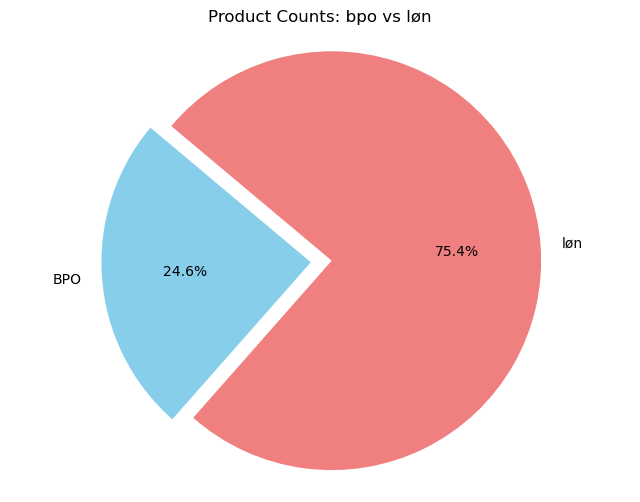

In [12]:
bpo_count = words_df[words_df['Løsning'] == 'bpo']['Løsning'].count()
print(bpo_count)
løn_count = words_df[words_df['Løsning'] == 'løn']['Løsning'].count()
print(løn_count)


import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['BPO', 'løn']
sizes = [bpo_count, løn_count]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Product Counts: bpo vs løn')
plt.show()

## The piechart shows that:
- When comparing løn against BPO, it is clear to see that significantly more companies who cancelled their agreement had løn than BPO.

## Product Count - Current Clients
Let us now look at the same pie-chart, but for our current customers instead, to see if the chart will look similar:

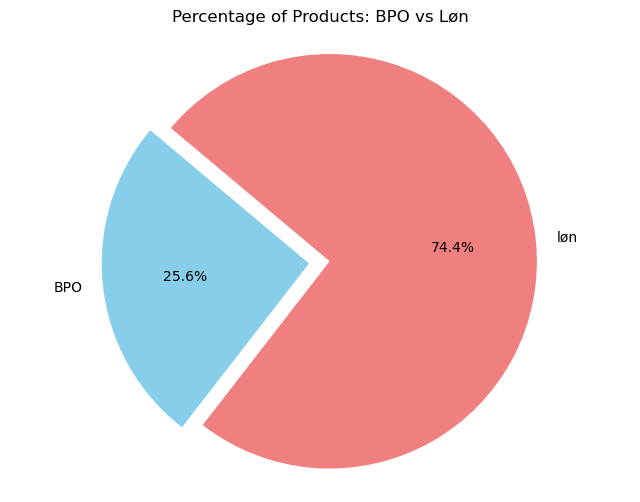

In [13]:
current_clients_df = pd.read_excel('NuværendeKunder.xlsx')

bpo_count = current_clients_df['BPO DK - Payslips'].count()
løn_count = current_clients_df['SaaS Payslips'].count()
total_products = bpo_count + løn_count

bpo_percentage = (bpo_count / total_products) * 100
løn_percentage = (løn_count / total_products) * 100

abels = ['BPO', 'Løn']
sizes = [bpo_percentage, løn_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Percentage of Products: BPO vs Løn')
plt.show()





## Tendency:
The two pie charts look almost identical, showcasing that the current client base has a very similar distribution in regard to løn and BPO. Let us confirm these numbers:

## Confirm numbers

In [14]:
# Count companies with 'BPO DK - Payslips'
bpo_companies = len(current_clients_df[current_clients_df['BPO DK - Payslips'] > 0])

# Count companies with 'SaaS Payslips'
løn_companies = len(current_clients_df[current_clients_df['SaaS Payslips'] > 0])

print(f"Number of companies with 'BPO DK - Payslips': {bpo_companies}")
print(f"Number of companies with 'SaaS Payslips': {løn_companies}")


Number of companies with 'BPO DK - Payslips': 281
Number of companies with 'SaaS Payslips': 816


## This is interesting, but let us look at the TCV-value from the above pie-charts:

## TCV-value for løn and BPO for cancelled clients (sum and yearly)

In [15]:
# Create a filtered DataFrame for rows with 'bpo'
bpo_rows = words_df[words_df['Løsning'] == 'bpo']

# Create a filtered DataFrame for rows with 'løn'
løn_rows = words_df[words_df['Løsning'] == 'løn']

# Calculate total 'Beløb 12 mdr. (TCV)' for each product
bpo_tcv = bpo_rows['Beløb 12 mdr. (TCV)'].sum()
løn_tcv = løn_rows['Beløb 12 mdr. (TCV)'].sum()

print(f"Total 'Beløb 12 mdr. (TCV)' for cancelled clients with 'BPO': {bpo_tcv}")
print(f"Total 'Beløb 12 mdr. (TCV)' for cancelled clients with 'Løn': {løn_tcv}")


Total 'Beløb 12 mdr. (TCV)' for cancelled clients with 'BPO': 15617356.06
Total 'Beløb 12 mdr. (TCV)' for cancelled clients with 'Løn': 27763170.809999995


# BPO TCV Value for each year (2021, 2022, 2023)


In [16]:
bpo_rows['Opsagt dato:'] = pd.to_datetime(bpo_rows['Opsagt dato:'], errors='coerce', dayfirst=True)
løn_rows['Opsagt dato:'] = pd.to_datetime(løn_rows['Opsagt dato:'], errors='coerce', dayfirst=True)

# Extract cancellation year from the cancellation date column
bpo_rows['Cancellation Year'] = bpo_rows['Opsagt dato:'].dt.year
løn_rows['Cancellation Year'] = løn_rows['Opsagt dato:'].dt.year

# Group by the cancellation year and sum the 'Beløb 12 mdr. (TCV)' for BPO
bpo_yearly_tcv = bpo_rows.groupby('Cancellation Year')['Beløb 12 mdr. (TCV)'].sum()

# Group by the cancellation year and sum the 'Beløb 12 mdr. (TCV)' for Løn
løn_yearly_tcv = løn_rows.groupby('Cancellation Year')['Beløb 12 mdr. (TCV)'].sum()

# Display the results
for year, tcv in bpo_yearly_tcv.iteritems():
    print(f"BPO TCV Value for {year}: {tcv}")

for year, tcv in løn_yearly_tcv.iteritems():
    print(f"Løn TCV Value for {year}: {tcv}")

    

BPO TCV Value for 2021.0: 7100497.609999999
BPO TCV Value for 2022.0: 4795791.07
BPO TCV Value for 2023.0: 3583933.38
Løn TCV Value for 2021.0: 10982903.58
Løn TCV Value for 2022.0: 10395612.33
Løn TCV Value for 2023.0: 6247520.9


C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_7072\2950455713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpo_rows['Opsagt dato:'] = pd.to_datetime(bpo_rows['Opsagt dato:'], errors='coerce', dayfirst=True)
C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_7072\2950455713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  løn_rows['Opsagt dato:'] = pd.to_datetime(løn_rows['Opsagt dato:'], errors='coerce', dayfirst=True)
C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_7072\295

## This means that:

## BPO:
- In 2021, BPO summed up to a value of: 7100497 DKK
- In 2022, BPO summed up to a value of: 4795791 DKK
- In 2023, BPO summed up to a value of: 3583933.38 DKK

## Løn:
- In 2021, løn summed up to a value of: 10982903 DKK
- In 2022, løn summed up to a value of: 10395612 DKK
- In 2023, løn summed up to a value of: 6247520.9 DKK

# Current Clients (BPO / løn)

In [17]:
# Load the data
current_clients_df = pd.read_excel('NuværendeKunder.xlsx')

# Compute the TCV for 'BPO DK - Payslips'
bpo_tcv_current = current_clients_df['BPO DK - Payslips'].sum()

# Compute the TCV for 'SaaS Payslips'
løn_tcv_current = current_clients_df['SaaS Payslips'].sum()

print(f"Total TCV for current clients with 'BPO': {bpo_tcv_current}")
print(f"Total TCV for current clients with 'Løn': {løn_tcv_current}")


Total TCV for current clients with 'BPO': 11021198.879999995
Total TCV for current clients with 'Løn': 12345017.84


# Industry Analysis
This section aims to explore the industries of the companies that terminated their agreements with Visma Enterprise. The primary objective is to identify any potential trends or tendencies within these industries. We will investigate whether certain industries exhibit a higher tendency to cancel their agreements with us, thus shedding light on the impact of industry segmentation on our business relationships


First, let us load in the IndustryList.xlsx, which contains a list of every company in Denmark and their corresponding industry as well as CVR number. We will then match the IndustryList with the all_years list (which contains the merged 2021, 2022 and 2023 excel sheets).

In [18]:
industry_data = pd.read_excel('IndustryList.xlsx')

industry_data['CVR'] = industry_data['CVR + navn'].str.slice(0, 8)

all_years['CVR'] = all_years['CVR'].astype(str)
industry_data['CVR'] = industry_data['CVR'].astype(str)

all_years = pd.merge(all_years, industry_data, on='CVR', how='left')


## NaN values:
Some industries might not be present in the all_years list after the merging has completed, this can happen due to a variety of reasons.

In [19]:
nan_industry_count = all_years['Industri'].isna().sum()
print(f'Number of NaN values in Industry column: {nan_industry_count}')


Number of NaN values in Industry column: 32


## Visualization of industires

To visually represent the distribution of industries from the companies that canceled their agreement with us, we will create a graph. The graph will display the frequency or count of companies in each industry. This will help us better understand which industries are more prominently represented among the companies that terminated their agreements with Visma Enterprise.

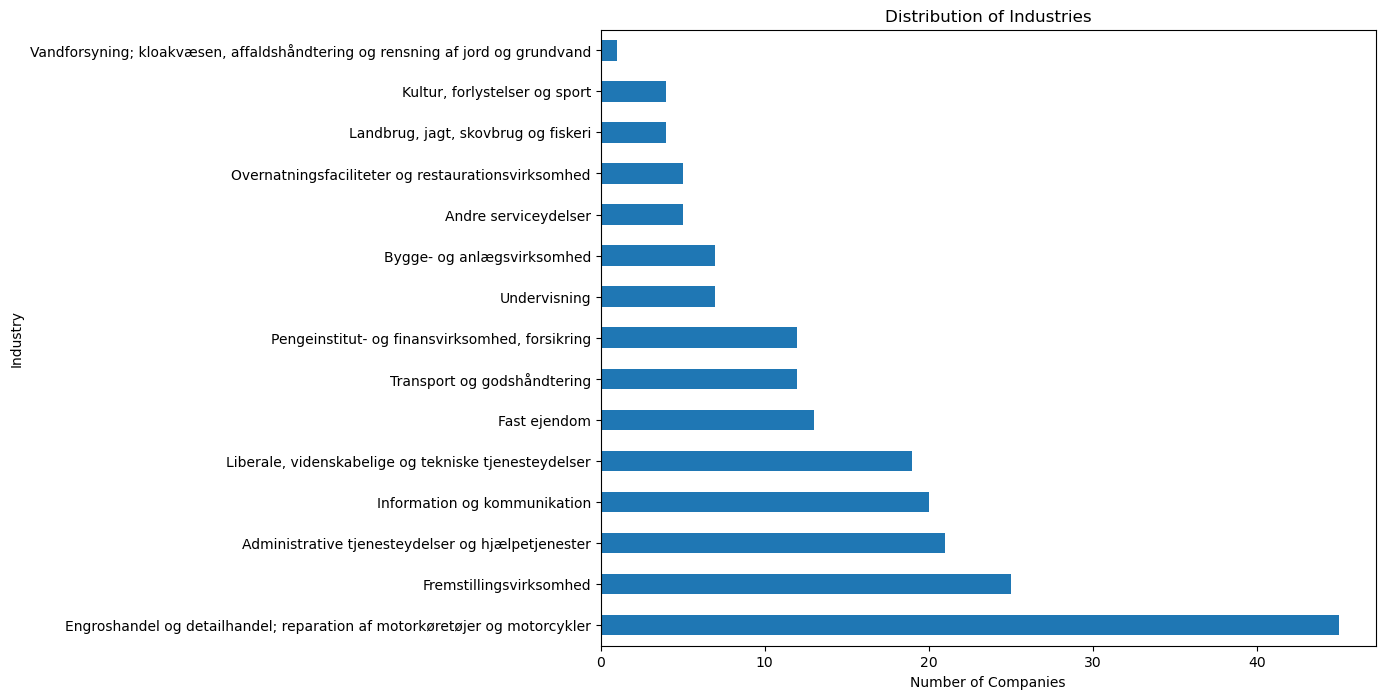

In [20]:
import matplotlib.pyplot as plt

industry_counts = all_years['Industri'].value_counts()
industry_counts.plot(kind='barh', figsize=(10,8))
plt.title('Distribution of Industries')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()


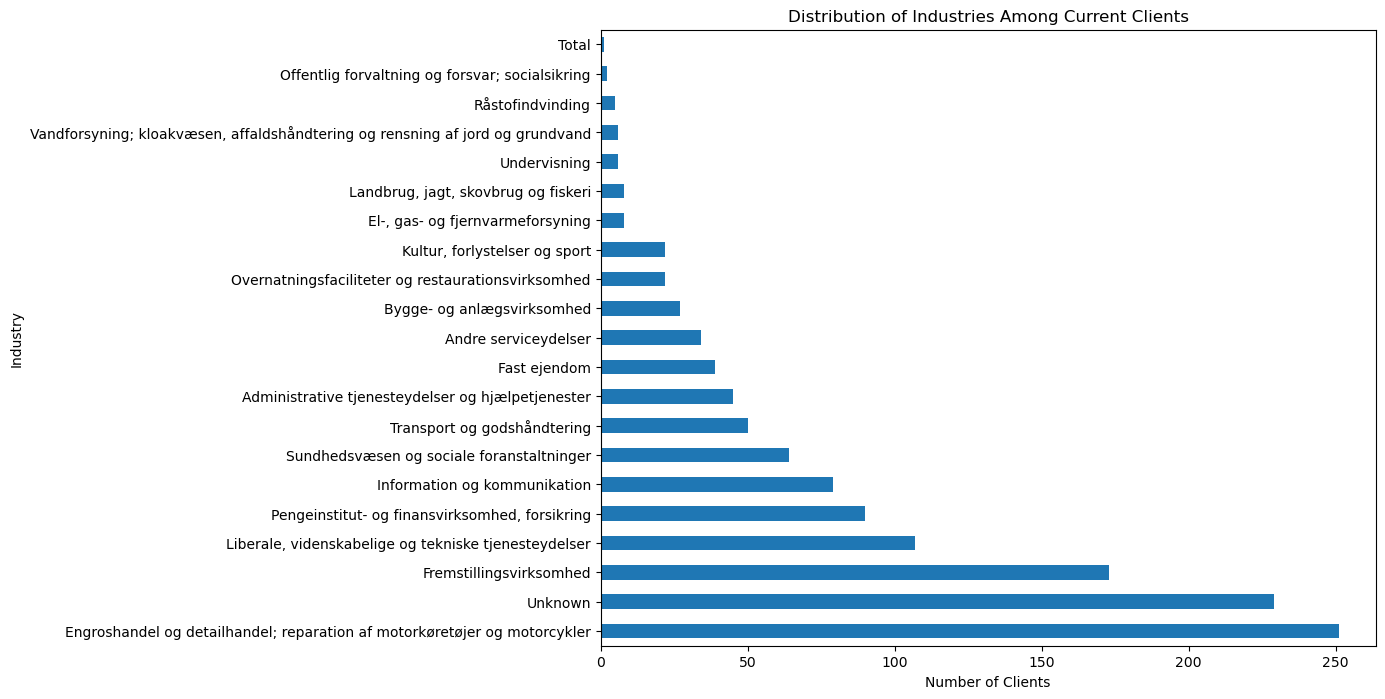

In [21]:
# Assume current_clients_df is your DataFrame containing your current client list
# Read it from a file, if necessary
current_clients_df = pd.read_excel('NuværendeKunder.xlsx')

# Replace null values in the 'Industri' column with the string 'Unknown'
current_clients_df['Industri'] = current_clients_df['Industri'].fillna('Unknown')

# Now, attempt the counting again
client_industry_counts = current_clients_df['Industri'].value_counts()

# Calculate percentages
client_industry_percentages = client_industry_counts / len(current_clients_df) * 100


client_industry_counts.plot(kind='barh', figsize=(10,8))
plt.title('Distribution of Industries Among Current Clients')
plt.xlabel('Number of Clients')
plt.ylabel('Industry')
plt.show()



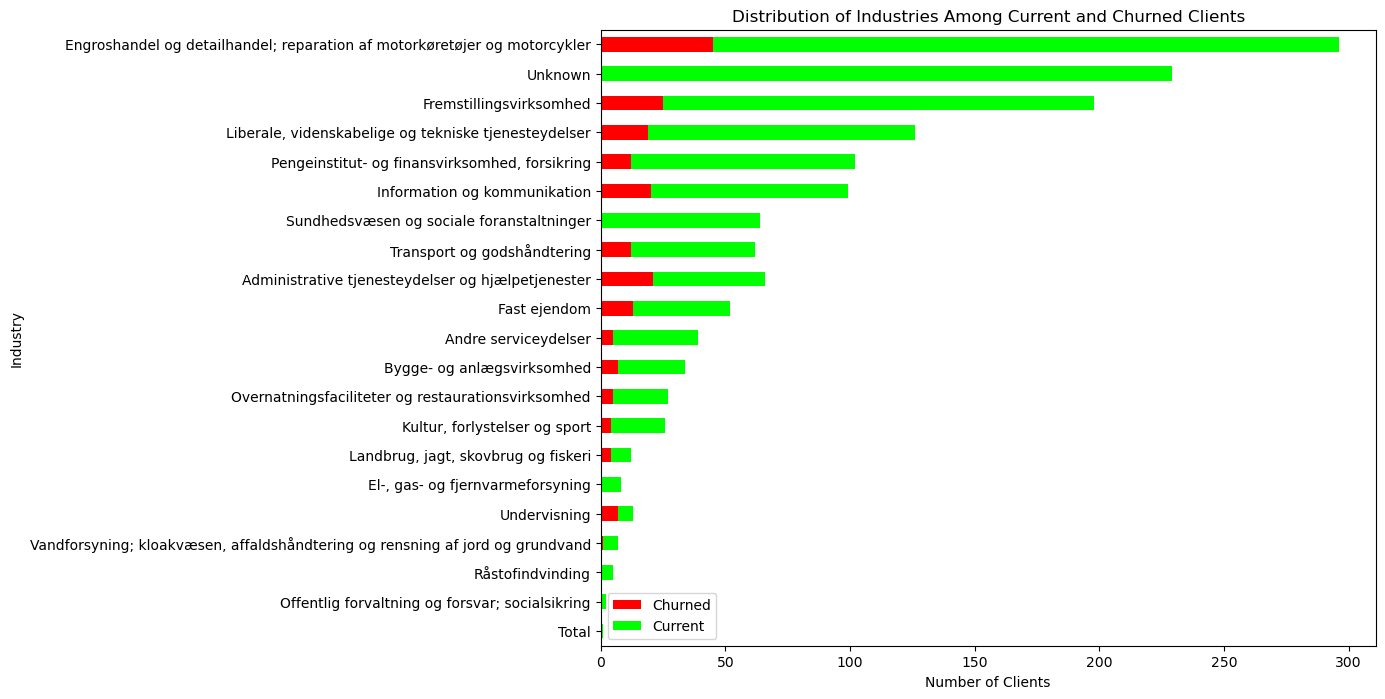

In [22]:
all_industries = set(industry_counts.index).union(set(client_industry_counts.index))

industry_counts = industry_counts.reindex(all_industries, fill_value=0)
client_industry_counts = client_industry_counts.reindex(all_industries, fill_value=0)

df = pd.DataFrame({'Churned': industry_counts, 'Current': client_industry_counts})
# Sort DataFrame by total count in each industry
df = df.sort_values(by=['Current', 'Churned'], ascending=True)

# Create the stacked bar chart
df.plot(kind='barh', stacked=True, figsize=(10,8), color=['red', 'lime'])
plt.title('Distribution of Industries Among Current and Churned Clients')
plt.xlabel('Number of Clients')
plt.ylabel('Industry')
plt.show()


In [23]:

# Load the employee data
employee_data = pd.read_excel('stop kunder.xlsx')

# Convert 'CVR' column in employee_data and 'CVR' in all_years to string
employee_data['CVR'] = employee_data['CVR'].astype(str)
all_years['CVR'] = all_years['CVR'].astype(str)

# Merge the dataframes
all_years = pd.merge(all_years, employee_data[['CVR', 'Aktive medarbejdere']], on='CVR', how='left')
all_years.to_excel('ModifiedAllYears.xlsx', index=False)



C:\Users\jean-claude.disch\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


## Company size (employee count) Histogram

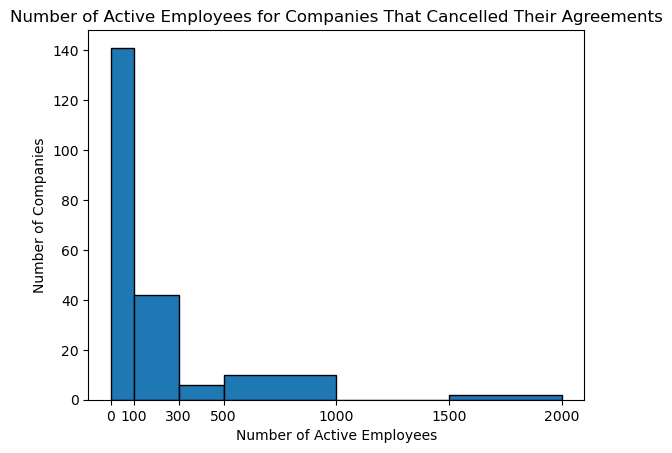

In [42]:
import matplotlib.pyplot as plt

# Ensure 'Aktive medarbejdere' column is numeric
all_years['Aktive medarbejdere'] = pd.to_numeric(all_years['Aktive medarbejdere'], errors='coerce')

# Plot a histogram with modified intervals
plt.hist(all_years['Aktive medarbejdere'].dropna(), bins=[0,100, 300, 500, 1000, 1500, 2000], edgecolor='black')
plt.title('Number of Active Employees for Companies That Cancelled Their Agreements')
plt.xlabel('Number of Active Employees')
plt.ylabel('Number of Companies')
plt.xticks([0, 100, 300, 500, 1000, 1500, 2000])
plt.show()

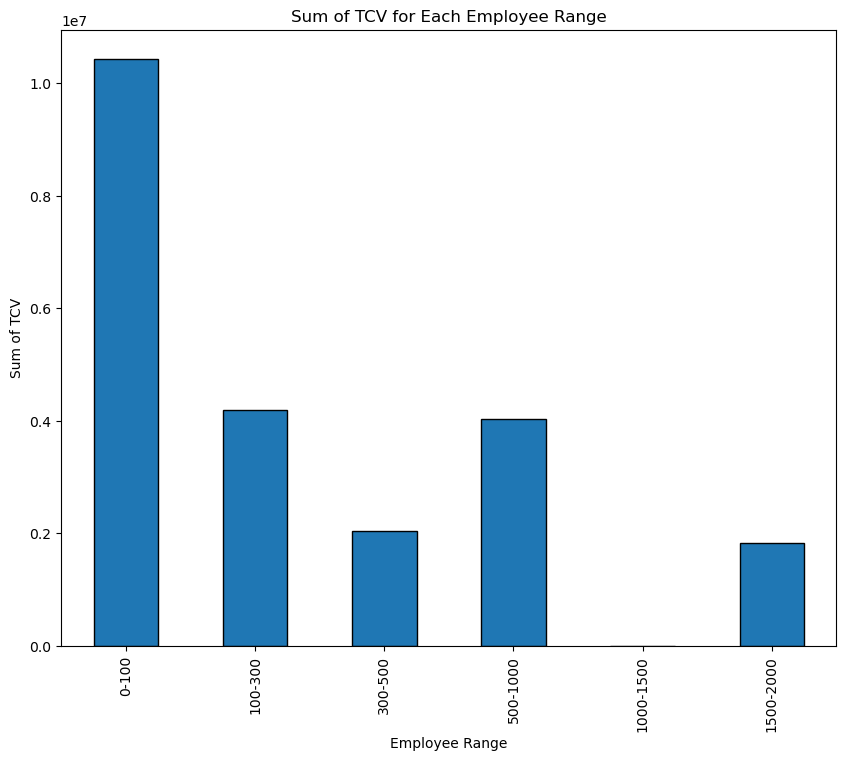

In [25]:
# Define bins
bins = [0, 100, 300, 500, 1000, 1500, 2000]
labels = ['0-100', '100-300', '300-500', '500-1000', '1000-1500', '1500-2000']

# Create a new column 'Employee_range' in all_years dataframe based on 'Aktive medarbejdere' column
all_years['Employee_range'] = pd.cut(all_years['Aktive medarbejdere'], bins=bins, labels=labels)

# Group the dataframe by 'Employee_range' and sum up 'Beløb 12 mdr. (TCV)' in each group
tcv_sum = all_years.groupby('Employee_range')['Beløb 12 mdr. (TCV)'].sum()

# Plot the result
tcv_sum.plot(kind='bar', figsize=(10,8), edgecolor='black')
plt.title('Sum of TCV for Each Employee Range')
plt.xlabel('Employee Range')
plt.ylabel('Sum of TCV')
plt.show()


In [26]:
# Group by employee range and calculate the sum of TCV for each group
tcv_sum = all_years.groupby('Employee_range')['Beløb 12 mdr. (TCV)'].sum()

# Convert the Series to a DataFrame
tcv_sum_df = tcv_sum.reset_index()

# Rename the columns
tcv_sum_df.columns = ['Employee Range', 'Sum of TCV']

# Display the DataFrame
print(tcv_sum_df)


  Employee Range   Sum of TCV
0          0-100  10427117.69
1        100-300   4186467.35
2        300-500    2035820.0
3       500-1000   4034193.99
4      1000-1500            0
5      1500-2000   1833802.04


In [27]:
# Calculate the total TCV
total_tcv = tcv_sum_df['Sum of TCV'].sum()

# Calculate the percentage of total TCV for each group
tcv_sum_df['Percentage of Total TCV'] = (tcv_sum_df['Sum of TCV'] / total_tcv) * 100

# Display the DataFrame
print(tcv_sum_df)


  Employee Range   Sum of TCV Percentage of Total TCV
0          0-100  10427117.69               46.306932
1        100-300   4186467.35               18.592143
2        300-500    2035820.0                9.041097
3       500-1000   4034193.99               17.915895
4      1000-1500            0                     0.0
5      1500-2000   1833802.04                8.143933


In [28]:
# Define bins
bins = [0, 100, 300, 500, 1000, 1500, 2000]
labels = ['0-100', '100-300', '300-500', '500-1000', '1000-1500', '1500-2000']

# Create a new column 'Employee_range' in all_years dataframe based on 'Aktive medarbejdere' column
all_years['Employee_range'] = pd.cut(all_years['Aktive medarbejdere'], bins=bins, labels=labels)

# Group the dataframe by 'Employee_range' and sum up 'Beløb 12 mdr. (TCV)' in each group
tcv_sum = all_years.groupby('Employee_range')['Beløb 12 mdr. (TCV)'].sum()

# Convert the Series to a DataFrame
tcv_sum_df = tcv_sum.reset_index()

# Rename the columns
tcv_sum_df.columns = ['Employee Range', 'Sum of TCV']

# Display the DataFrame
print(tcv_sum_df)


  Employee Range   Sum of TCV
0          0-100  10427117.69
1        100-300   4186467.35
2        300-500    2035820.0
3       500-1000   4034193.99
4      1000-1500            0
5      1500-2000   1833802.04


In [29]:
# Calculate the total TCV
total_tcv = tcv_sum_df['Sum of TCV'].sum()

# Calculate the percentage of total TCV for each group
tcv_sum_df['Percentage of Total TCV'] = (tcv_sum_df['Sum of TCV'] / total_tcv) * 100

# Display the DataFrame
print(tcv_sum_df)


  Employee Range   Sum of TCV Percentage of Total TCV
0          0-100  10427117.69               46.306932
1        100-300   4186467.35               18.592143
2        300-500    2035820.0                9.041097
3       500-1000   4034193.99               17.915895
4      1000-1500            0                     0.0
5      1500-2000   1833802.04                8.143933


In [30]:
missing_employee_tcv_sum = all_years[all_years['Aktive medarbejdere'].isna()]['Beløb 12 mdr. (TCV)'].sum()
print("Sum of 'Beløb 12 mdr. (TCV)' where 'Aktive medarbejdere' is missing: ", missing_employee_tcv_sum)


Sum of 'Beløb 12 mdr. (TCV)' where 'Aktive medarbejdere' is missing:  3867842.8699999996


In [31]:
# Make sure 'CVR' columns are of the same type (string)
current_clients_df['CVR'] = current_clients_df['CVR'].astype(str)
industry_data['CVR'] = industry_data['CVR'].astype(str)

# Merge the dataframes on 'CVR', keeping only the rows in current_clients_df that have a matching 'CVR' in industry_data
merged_clients = pd.merge(current_clients_df, industry_data[['CVR', 'No Measure Value']], on='CVR', how='left')

# Rename 'No Measure Value' to 'Aktive medarbejdere'
merged_clients.rename(columns={'No Measure Value': 'Aktive medarbejdere'}, inplace=True)

# Make sure 'Aktive medarbejdere' column is numeric
merged_clients['Aktive medarbejdere'] = pd.to_numeric(merged_clients['Aktive medarbejdere'], errors='coerce')


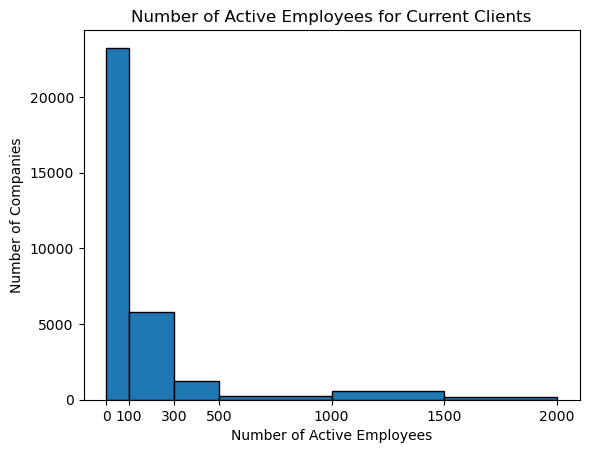

In [32]:
# Plot a histogram with modified intervals
plt.hist(merged_clients['Aktive medarbejdere'].dropna(), bins=[0,100, 300, 500, 1000, 1500, 2000], edgecolor='black')
plt.title('Number of Active Employees for Current Clients')
plt.xlabel('Number of Active Employees')
plt.ylabel('Number of Companies')
plt.xticks([0, 100, 300, 500, 1000, 1500, 2000])
plt.show()


In [43]:
# Define bins and labels
bins = [0, 100, 300, 500, 1000, 1500, 2000, np.inf]
labels = ['0-100', '100-300', '300-500', '500-1000', '1000-1500', '1500-2000', '2000+']

# Create a new column 'Employee_range' in the merged dataframe based on 'Aktive medarbejdere' column
merged_clients['Employee_range'] = pd.cut(merged_clients['Aktive medarbejdere'], bins=bins, labels=labels)

# Group the dataframe by 'Employee_range' and count the number of companies in each group
employee_range_counts = merged_clients['Employee_range'].value_counts().sort_index()

# Calculate the percentage of companies in each employee range
employee_range_percentages = employee_range_counts / merged_clients['Aktive medarbejdere'].count() * 100

# Convert the Series to a DataFrame
employee_range_df = pd.DataFrame({
    'Employee Range': employee_range_percentages.index,
    'Percentage of Total Companies': employee_range_percentages.values
})

print(employee_range_df)


  Employee Range  Percentage of Total Companies
0          0-100                      73.173364
1        100-300                      17.869612
2        300-500                       3.850060
3       500-1000                       0.739542
4      1000-1500                       1.863137
5      1500-2000                       0.622104
6          2000+                       0.641148


## Company size (employee count) table
The below table showcases the exact same as the histogram above, but in table form.

In [44]:
# Create histogram
hist, bin_edges = np.histogram(all_years['Aktive medarbejdere'].dropna(), bins=[0,100, 300, 500, 1000, 1500, 2000])

# Create bin labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

# Create dataframe
hist_df = pd.DataFrame({'Employee Range': bin_labels, 'Number of Companies': hist})

print(hist_df)


  Employee Range  Number of Companies
0          0-100                  141
1        100-300                   42
2        300-500                    6
3       500-1000                   10
4      1000-1500                    0
5      1500-2000                    2


# Avg, max, min
Outliers have been removed to ensure data consitency.

In [35]:
# Calculate the IQR of the data
Q1 = all_years['Aktive medarbejdere'].quantile(0.20)
Q3 = all_years['Aktive medarbejdere'].quantile(0.99)

# Only keep rows in the data frame where the 'Aktive medarbejdere' value is between Q1 and Q3
filtered_data = all_years[(all_years['Aktive medarbejdere'] >= Q1) & (all_years['Aktive medarbejdere'] <= Q3)]

# Now, calculate the average, highest, and lowest number of employees after removing outliers
average_employees = filtered_data['Aktive medarbejdere'].mean()
highest_employees = filtered_data['Aktive medarbejdere'].max()
lowest_employees = filtered_data['Aktive medarbejdere'].min()

# Create a DataFrame to store the results
summary_table = pd.DataFrame({
    'Statistic': ['Average', 'Highest', 'Lowest'],
    'Number of Employees': [average_employees, highest_employees, lowest_employees]
})

print(summary_table)


  Statistic  Number of Employees
0   Average           165.585366
1   Highest          3030.000000
2    Lowest            15.000000


## Hvorfor ønsker kunden at opsige

This section will conclude on tendencies which have occurred throughout the analysis.

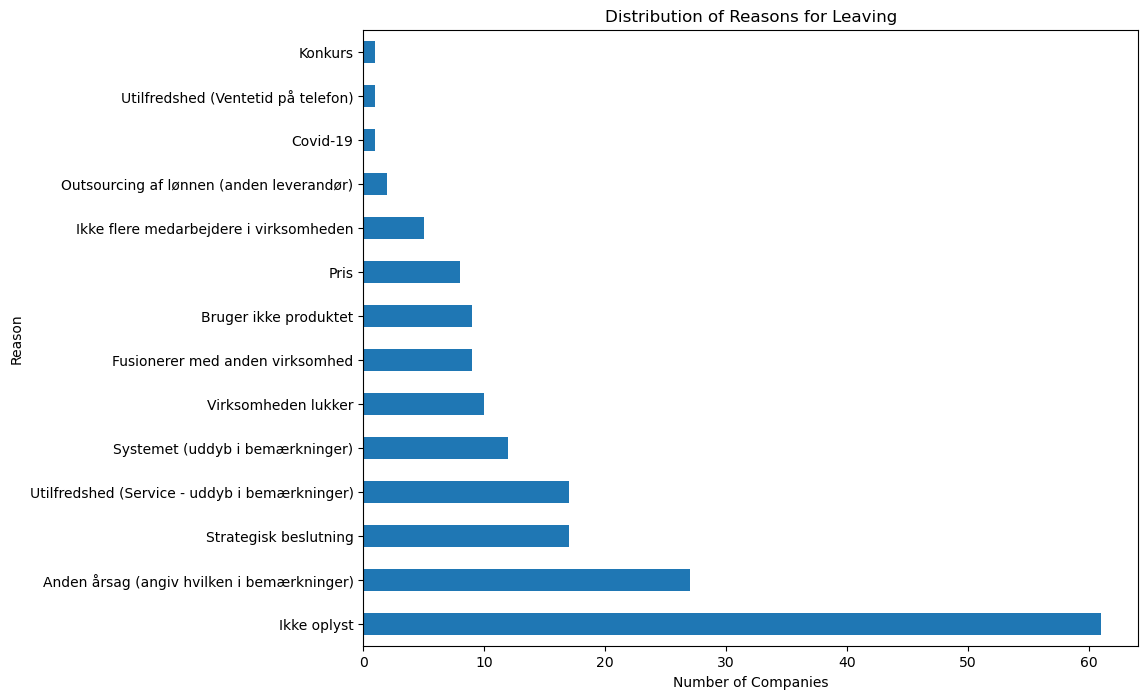

In [36]:
reason_counts = all_years['Årsag'].value_counts()
reason_counts.plot(kind='barh', figsize=(10,8))
plt.title('Distribution of Reasons for Leaving')
plt.xlabel('Number of Companies')
plt.ylabel('Reason')
plt.show()

## Muligvis dyk ned i bemærkninger?

## Ny leverandør

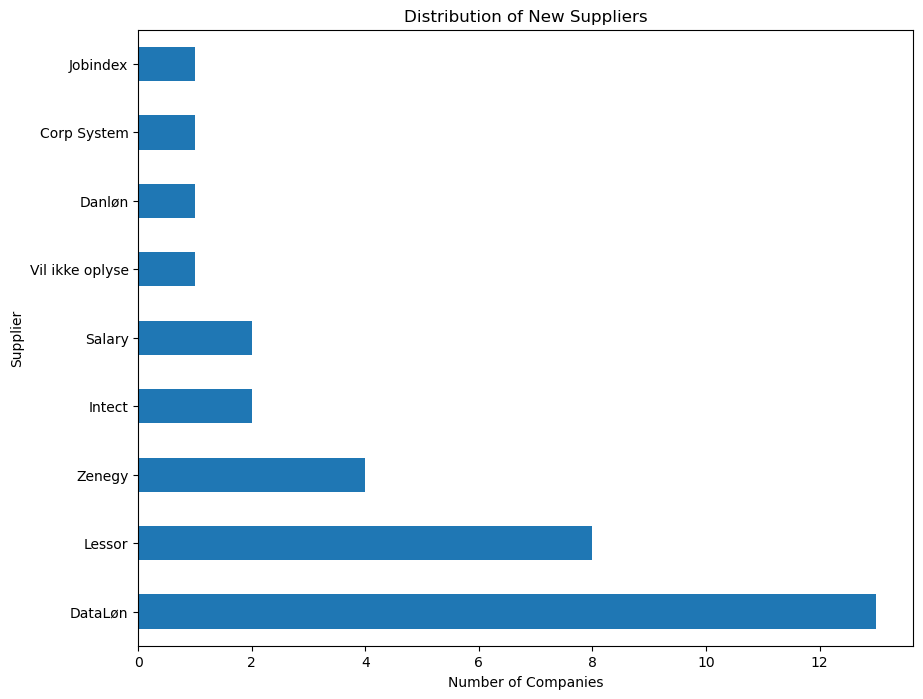

In [37]:
supplier_counts = all_years['Ny leverandør'].value_counts()
supplier_counts.plot(kind='barh', figsize=(10,8))
plt.title('Distribution of New Suppliers')
plt.xlabel('Number of Companies')
plt.ylabel('Supplier')
plt.show()

## 2023 lost tcv + number of cancellations

In [38]:
import pandas as pd

# Filter the all_years dataframe for records from 2023
all_years_2023 = all_years[all_years['Year'] == 2023]

# Ensure the 'Aktive medarbejdere' column is numeric
all_years_2023['Aktive medarbejdere'] = pd.to_numeric(all_years_2023['Aktive medarbejdere'], errors='coerce')

# Filter the dataframe for companies with fewer than 100 active employees
filtered = all_years_2023[all_years_2023['Aktive medarbejdere'] < 100]

# Group the filtered dataframe by the desired columns
grouped = filtered.groupby(['CVR']).agg({'Beløb 12 mdr. (TCV)': 'sum', 'CVR': 'nunique'})

# Rename the columns
grouped.columns = ['Lost TCV', 'Number of Cancellations']

# Reset the index
grouped.reset_index(inplace=True)

# Export the grouped dataframe to an Excel file
grouped.to_excel('LostTCV_and_Cancellations_2023.xlsx', index=False)


C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_7072\2402368638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_2023['Aktive medarbejdere'] = pd.to_numeric(all_years_2023['Aktive medarbejdere'], errors='coerce')


In [39]:
all_years_2023

,CVR,Year,Beløb 12 mdr. (TCV),Løsning,Opsagt dato:,Årsag,Ny leverandør,Quarter,TCV_range,Num_Solutions,Range,CVR + navn,Postnummer,Postdistrikt,Industri,Branchetekst,Eksisterende,No Measure Value,Aktive medarbejdere,Employee_range
181,10082366,2023,4512.0,"[læseadgang, til, visma, løn]",2023-01-02,NaN,NaN,2023Q1,0-20000,1,0-20000,10082366 LOOMIS DANMARK A/S,"2,630",Taastrup,Administrative tjenesteydelser og hjælpetjenester,Private vagt- og sikkerhedstjenester,Ikke kunde,256.0,53.0,0-100
182,21582387,2023,52852.17,"[visma, løn]",2023-01-10,NaN,DataLøn,2023Q1,40000-60000,1,40000-60000,21582387 V. LØWENER A/S,"2,600",Glostrup,Engroshandel og detailhandel; reparation af mo...,Engroshandel med værktøjsmaskiner,Eksisterende kunde,47.0,NaN,NaN
183,36704608,2023,150188.0,"[bpo, løn, og, hr]",2023-01-13,NaN,NaN,2023Q1,140000-160000,2,140000-160000,36704608 OrderYOYO A/S,"2,100",København Ø,Information og kommunikation,Computerprogrammering,Eksisterende kunde,53.0,NaN,NaN
184,16049441,2023,199392.4,"[bpo, løn, og, hr]",2023-01-24,NaN,NaN,2023Q1,180000-200000,2,180000-200000,16049441 HAMLET PROTEIN A/S,"8,700",Horsens,Fremstillingsvirksomhed,Fremstilling af færdige foderblandinger til la...,Eksisterende kunde,118.0,62.0,0-100
185,32440975,2023,6137.0,"[læseadgang, til, visma, løn]",2023-01-25,NaN,NaN,2023Q1,0-20000,1,0-20000,32440975 GREENWAVE SYSTEMS ApS,"1,620",København V,Information og kommunikation,"Databehandling, webhosting og lignende service...",NaN,10.0,15.0,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,87719715,2023,129351.38,"[bpo, visma, løn, og, hr]",2023-08-31,NaN,NaN,2023Q3,120000-140000,2,120000-140000,87719715 LAMMHULTS BIBLIOTEKSDESIGN A/S,"6,670",Holsted,Fremstillingsvirksomhed,Fremstilling af kontor- og butiksmøbler,Eksisterende kunde,43.0,50.0,0-100
243,38283715,2023,146634.0,"[bpo, løn]",2023-08-31,NaN,NaN,2023Q3,140000-160000,1,140000-160000,38283715 ULTRABULK A/S,"2,820",Gentofte,Transport og godshåndtering,Sø- og kysttransport af gods,Eksisterende kunde,186.0,100.0,0-100
244,83090413,2023,95742.0,"[visma, løn]",2023-08-31,NaN,NaN,2023Q3,80000-100000,1,80000-100000,83090413 Scantox A/S,"4,623",Lille Skensved,"Liberale, videnskabelige og tekniske tjenestey...",Anden forskning og eksperimentel udvikling ind...,Eksisterende kunde,124.0,151.0,100-300
245,29975884,2023,44547.0,[easycruit],2023-09-08,NaN,Jobindex,2023Q3,40000-60000,1,40000-60000,29975884 Kalundborg Refinery A/S,"4,400",Kalundborg,Fremstillingsvirksomhed,Fremstilling af raffinerede mineralolieprodukter,Eksisterende kunde,385.0,383.0,300-500
